In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [71]:
harris_df = pd.read_csv('harris_merged_acs+epa_tracts.csv')

In [72]:
harris_df.head(2)

,GEO_ID,ID,NAME,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,DP05_0063E,DP05_0063M,DP05_0064E,...,RESP,RSEI_AIR,PTRAF,PRE1960,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS
0,1400000US48201100001,48201100001,"Census Tract 1000.01, Harris County, Texas",Texas,TX,Harris,6,4999,538,2957,...,0.4,39398.263343,1201.509898,511.0,0.140733,0.437887,0.660493,1.731679,11.655939,0.06414
1,1400000US48201210400,48201210400,"Census Tract 2104, Harris County, Texas",Texas,TX,Harris,6,4411,615,2573,...,0.4,49223.905064,427.109574,1090.0,0.619318,1.266042,0.870471,2.902851,8.362271,0.00155


In [73]:
harris_df.columns

Index(['GEO_ID', 'ID', 'NAME', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME',
       'REGION', 'DP05_0063E', 'DP05_0063M', 'DP05_0064E', 'DP05_0064M',
       'DP05_0065E', 'DP05_0065M', 'DP05_0067E', 'DP05_0067M', 'DP05_0071E',
       'DP05_0071M', 'PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'RSEI_AIR',
       'PTRAF', 'PRE1960', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST',
       'PWDIS'],
      dtype='object')

In [74]:
rel_col = ['GEO_ID', 'DP05_0065E', 'PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'RSEI_AIR',
       'PTRAF', 'PRE1960', 'PNPL', 'PRMP', 'PTSDF', 'UST',
       'PWDIS']

EDA for Black Population

In [75]:
bp_harris = harris_df[rel_col].dropna()

In [76]:
bp_harris.head(5)

,GEO_ID,DP05_0065E,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PTRAF,PRE1960,PNPL,PRMP,PTSDF,UST,PWDIS
0,1400000US48201100001,1302,10.413374,69.82427,0.579923,30.0,0.4,39398.263343,1201.509898,511.0,0.437887,0.660493,1.731679,11.655939,6.414024e-02
1,1400000US48201210400,614,10.431548,69.34762,0.592212,30.0,0.4,49223.905064,427.109574,1090.0,1.266042,0.870471,2.902851,8.362271,1.550186e-03
2,1400000US48201210500,666,10.420839,69.26327,0.602873,30.0,0.4,44498.086804,207.484566,1066.0,1.902621,1.064167,1.691259,10.418014,1.776223e-06
3,1400000US48201210600,512,10.427055,69.26547,0.610123,30.0,0.4,40079.008365,655.175495,2039.0,1.264183,0.453326,0.668696,8.679559,1.411952e-06
4,1400000US48201210700,406,10.419515,69.09112,0.591781,30.0,0.4,42410.908470,684.507951,701.0,2.777789,0.612060,1.039651,4.161179,5.353150e-07


In [77]:
bp_harris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 1114
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GEO_ID      1113 non-null   object 
 1   DP05_0065E  1113 non-null   int64  
 2   PM25        1113 non-null   float64
 3   OZONE       1113 non-null   float64
 4   DSLPM       1113 non-null   float64
 5   CANCER      1113 non-null   float64
 6   RESP        1113 non-null   float64
 7   RSEI_AIR    1113 non-null   float64
 8   PTRAF       1113 non-null   float64
 9   PRE1960     1113 non-null   float64
 10  PNPL        1113 non-null   float64
 11  PRMP        1113 non-null   float64
 12  PTSDF       1113 non-null   float64
 13  UST         1113 non-null   float64
 14  PWDIS       1113 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 139.1+ KB


In [78]:
bp_harris.describe()

,DP05_0065E,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PTRAF,PRE1960,PNPL,PRMP,PTSDF,UST,PWDIS
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03
mean,862.376460,10.179110,69.444642,0.370495,33.836478,0.390566,4.902260e+04,274.874323,209.045822,0.195678,0.978411,1.564867,3.690828,4.441055e-01
std,910.826159,0.339071,1.693345,0.098903,7.734246,0.052892,7.746058e+04,311.209251,303.920135,0.236111,1.375053,1.752587,2.717064,7.981858e+00
min,0.000000,8.877287,63.395200,0.160696,20.000000,0.300000,1.788356e+03,2.533006,0.000000,0.037768,0.055907,0.070387,0.000000,4.856105e-09
25%,193.000000,10.132979,68.633230,0.297700,30.000000,0.400000,1.688863e+04,100.593743,10.000000,0.083186,0.256458,0.345311,1.669723,1.977207e-03
50%,574.000000,10.311558,69.438780,0.352603,30.000000,0.400000,2.931833e+04,171.914186,68.000000,0.130663,0.572710,0.909266,3.136357,7.228444e-03
75%,1237.000000,10.391699,70.591090,0.432527,40.000000,0.400000,5.331747e+04,335.331719,285.000000,0.196317,1.078902,2.252499,4.929651,2.385300e-02
max,7105.000000,10.478830,72.500080,0.714894,100.000000,0.900000,1.141885e+06,4075.189078,2039.000000,2.777789,13.313610,13.838948,21.651956,1.924020e+02


<Axes: >

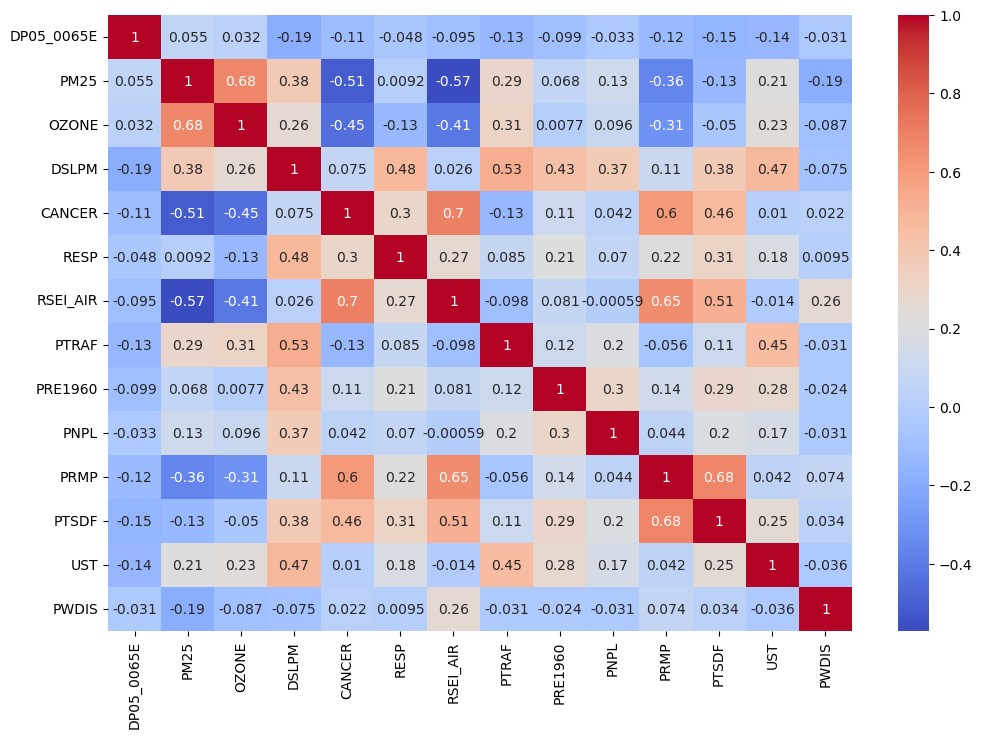

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(bp_harris.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [80]:
bp_harris.corr(numeric_only=True)['DP05_0065E'] # black population correlation

DP05_0065E    1.000000
PM25          0.054523
OZONE         0.031502
DSLPM        -0.190148
CANCER       -0.108230
RESP         -0.048019
RSEI_AIR     -0.094987
PTRAF        -0.132624
PRE1960      -0.098616
PNPL         -0.033314
PRMP         -0.122023
PTSDF        -0.153032
UST          -0.138013
PWDIS        -0.031349
Name: DP05_0065E, dtype: float64

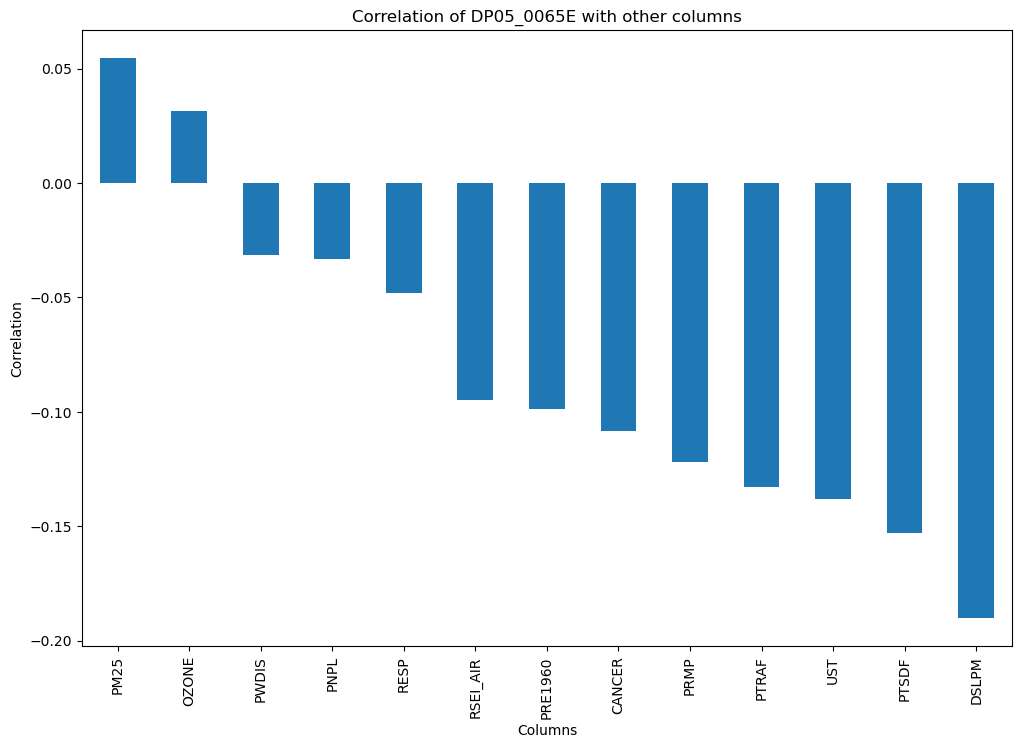

In [82]:
bp_harris.corr(numeric_only=True)['DP05_0065E'].sort_values(ascending=False).drop('DP05_0065E').plot(kind='bar', figsize=(12,8))

plt.title('Correlation of DP05_0065E with other columns')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()


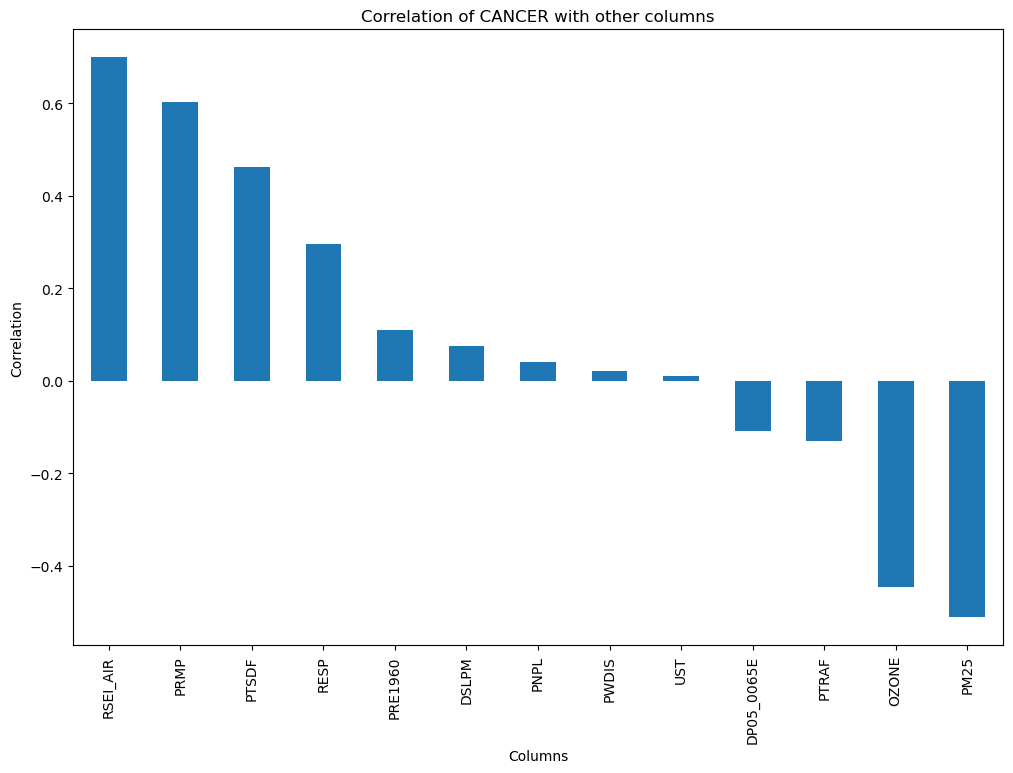

In [84]:
bp_harris.corr(numeric_only=True)['CANCER'].sort_values(ascending=False).drop('CANCER').plot(kind='bar', figsize=(12,8))

plt.title('Correlation of CANCER with other columns')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()